<a href="https://colab.research.google.com/github/Programer1554/Data-Science-4-Sem/blob/main/Car_Pricing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn as sk
import sklearn_pandas as skpd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.__version__

'2.2.2'

In [68]:
#Setting the main dataset
car_price_maindf=pd.read_csv('CarPrice_project.csv')
car_price_maindf

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [69]:
#Creating a copy
car_price_df=car_price_maindf.copy()

In [70]:
#Dataset
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [71]:
#Rows and Columns count
print(f'Number of Rows:{car_price_df.shape[0]}')
print(f'Number of Columns:{car_price_df.shape[1]}')

Number of Rows:205
Number of Columns:26


In [72]:
#Missing values count
car_price_df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [73]:
#Defining a function
def complete_info():
  null=pd.DataFrame(index=car_price_df.columns)
  null['data_type']= car_price_df.dtypes
  null['null_count']= car_price_df.isnull().sum()
  null['unique_count']= car_price_df.nunique()
  return null

complete_info()

,data_type,null_count,unique_count
car_ID,int64,0,205
symboling,int64,0,6
CarName,object,0,147
fueltype,object,0,2
aspiration,object,0,2
doornumber,object,0,2
carbody,object,0,5
drivewheel,object,0,3
enginelocation,object,0,2
wheelbase,float64,0,53


In [74]:
print(f'Number of Cars= {len(car_price_df["CarName"])}')
print(f'Car Brands: {len(car_price_df["CarName"])-len(car_price_df["CarName"].unique())}')

Number of Cars= 205
Car Brands: 58


In [75]:
#Car Name Checks
print(car_price_df.CarName.unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [76]:
car_price_df.drop_duplicates(subset='CarName', keep='first', inplace=True)
car_price_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0


In [77]:
#Car Bodies, wheels, Aspiration etc.
print("Car Bodies: ", car_price_df.carbody.unique())

Car Bodies:  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [78]:
print("Drive Wheels: ", car_price_df.drivewheel.unique())

Drive Wheels:  ['rwd' 'fwd' '4wd']


In [79]:
print("Car Aspiration: ", car_price_df.aspiration.unique())

Car Aspiration:  ['std' 'turbo']


In [80]:
#Comapring the data of cars with nearby rows
car_price_df.loc[130:160]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
130,131,0,renault 12tl,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.70,90,5100,23,31,9295.0
131,132,2,renault 5 gtl,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.70,90,5100,23,31,9895.0
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
133,134,2,saab 99le,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.30,110,5250,21,28,12170.0
135,136,2,saab 99gle,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.30,110,5250,21,28,15510.0
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.00,69,4900,31,36,5118.0
139,140,2,subaru dl,gas,std,two,hatchback,fwd,front,93.7,...,108,2bbl,3.62,2.64,8.70,73,4400,26,31,7053.0
142,143,0,subaru brz,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.50,82,4400,28,33,7775.0
143,144,0,subaru baja,gas,std,four,sedan,fwd,front,97.2,...,108,mpfi,3.62,2.64,9.00,94,5200,26,32,9960.0
144,145,0,subaru r1,gas,std,four,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.00,82,4800,24,25,9233.0


In [81]:
#Conversion of data into sutaible type
car_price_df['wheelbase']= car_price_df.wheelbase.astype(float)
car_price_df['carlength']= car_price_df.carlength.astype(float)
car_price_df['curbweight']= car_price_df.curbweight.astype(float)
car_price_df['carheight']= car_price_df.carheight.astype(float)
car_price_df['carwidth']= car_price_df.carwidth.astype(float)
car_price_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0


In [82]:
print("Car Fuel system: ", car_price_df.fuelsystem.unique())

Car Fuel system:  ['mpfi' '2bbl' 'mfi' '1bbl' '4bbl' 'idi' 'spdi']


In [83]:
car_price_df['price']= car_price_df.price.astype(int)
car_price_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950


In [84]:
arr=car_price_df['CarName']
print(arr)

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
196                 volvo 244dl
197                   volvo 245
198                 volvo 264gl
199                volvo diesel
203                   volvo 246
Name: CarName, Length: 147, dtype: object


In [87]:
def Carseperation():
  arr=car_price_df['CarName'].reset_index(drop=True)
  arr2=[]
  for i in range(len(arr)):
    j = 0
    for j in range(len(arr[i])):
      if arr[i][j]==' ':
        break
      else:
        continue
    arr2.append(arr[i][:j])
  return arr2

car_brands = Carseperation()
print(car_brands)

['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar', 'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'mercury', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'Nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'peugeot', 'peugeot', 'peugeot', 'peugeot', 'peugeot', 'plymouth', 'plymouth', 'plymouth', 'plymouth', 'plymouth', 'plymouth', 'porsche', 'porcshce', 'porsche', 'porsche', 'ren

In [88]:
car_price_df.insert(3,"CarBrands",car_brands)

ValueError: cannot insert CarBrands, already exists

In [90]:
car_price_df

,car_ID,symboling,CarName,CarBrands,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,-2,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,198,-1,volvo 245,volvo,gas,std,four,wagon,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,199,-2,volvo 264gl,volvo,gas,turbo,four,sedan,rwd,front,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,200,-1,volvo diesel,volvo,gas,turbo,four,wagon,rwd,front,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950


In [91]:
complete_info()

,data_type,null_count,unique_count
car_ID,int64,0,147
symboling,int64,0,6
CarName,object,0,147
CarBrands,object,0,29
fueltype,object,0,2
aspiration,object,0,2
doornumber,object,0,2
carbody,object,0,5
drivewheel,object,0,3
enginelocation,object,0,2


In [92]:
car_price_df.shape

(147, 27)

In [93]:
categorically_summerization=car_price_df.groupby('CarName').agg({"CarBrands":'sum', "fueltype":'sum','carbody':'sum','drivewheel':'sum','horsepower':'mean', 'price': 'sum'})
categorically_summerization

,CarBrands,fueltype,carbody,drivewheel,horsepower,price
CarName,,,,,,
Nissan versa,Nissan,gas,sedan,fwd,69.0,5499
alfa-romero Quadrifoglio,alfa-romero,gas,hatchback,rwd,154.0,16500
alfa-romero giulia,alfa-romero,gas,convertible,rwd,111.0,13495
alfa-romero stelvio,alfa-romero,gas,convertible,rwd,111.0,16500
audi 100 ls,audi,gas,sedan,fwd,102.0,13950
...,...,...,...,...,...,...
volvo 246,volvo,diesel,sedan,rwd,106.0,22470
volvo 264gl,volvo,gas,sedan,rwd,162.0,18420
volvo diesel,volvo,gas,wagon,rwd,162.0,18950


In [94]:
#unique Categories of cars
len(car_price_df['CarBrands'].unique())

29

Text(0.5, 1.0, 'Top Car Brands')

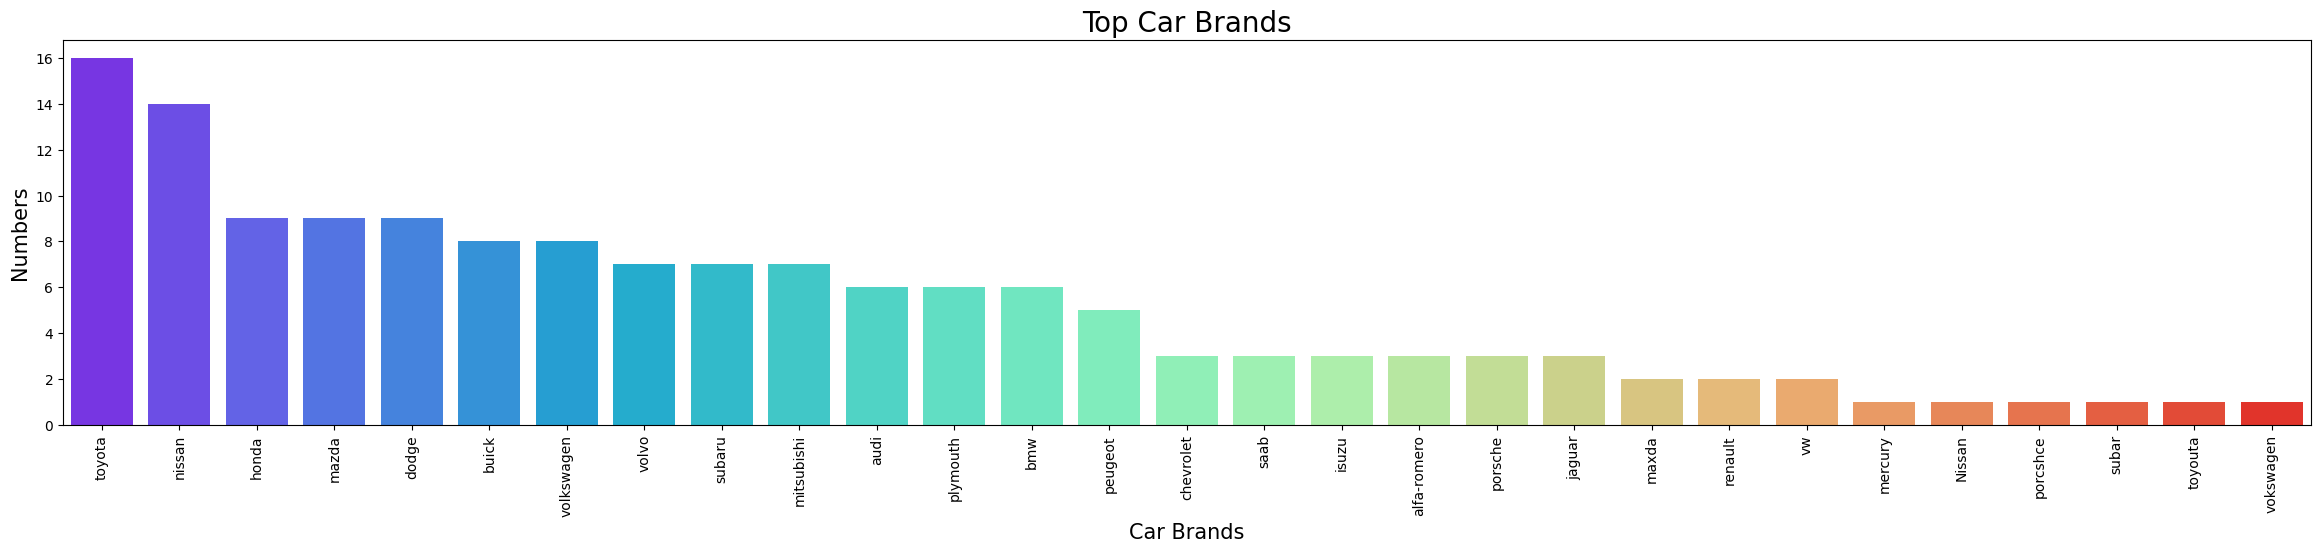

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
#Determining top Categories of cars in data
x=car_price_df['CarBrands'].value_counts().index
y=car_price_df['CarBrands'].value_counts()
xaxis=[]
yaxis=[]
for i in range(len(x)):
  xaxis.append(x[i])
  yaxis.append(y[i])

#Plotting graph/visuals for the same
plt.figure(figsize=(29,5))
plt.xlabel("Car Brands", fontsize=15)
plt.ylabel("Numbers", fontsize=15)
plt.xticks(rotation=90)
car_brands_graph= sns.barplot(x=xaxis, y=yaxis, palette="rainbow")
car_brands_graph.set_title("Top Car Brands", fontsize=20)

In [99]:
#Finding top ten car brands
top10_car_brands=car_price_df['CarBrands'].value_counts().head(10)
top10_car_brands

,count
CarBrands,
toyota,16
nissan,14
honda,9
mazda,9
dodge,9
buick,8
volkswagen,8
volvo,7
subaru,7


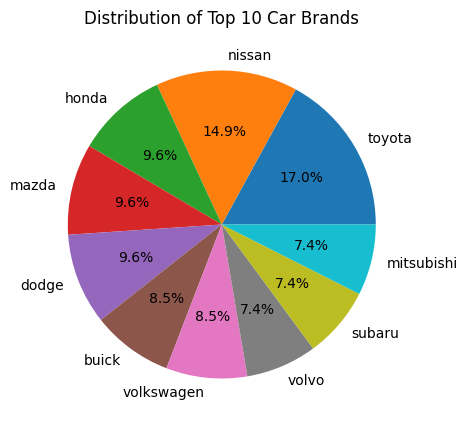

In [101]:
#Plotting Distribution of top 10 car brands
plt.figure(figsize=(10,5))
plt.pie(top10_car_brands, labels=top10_car_brands.index, autopct='%1.1f%%')
plt.title('Distribution of Top 10 Car Brands')
plt.show()

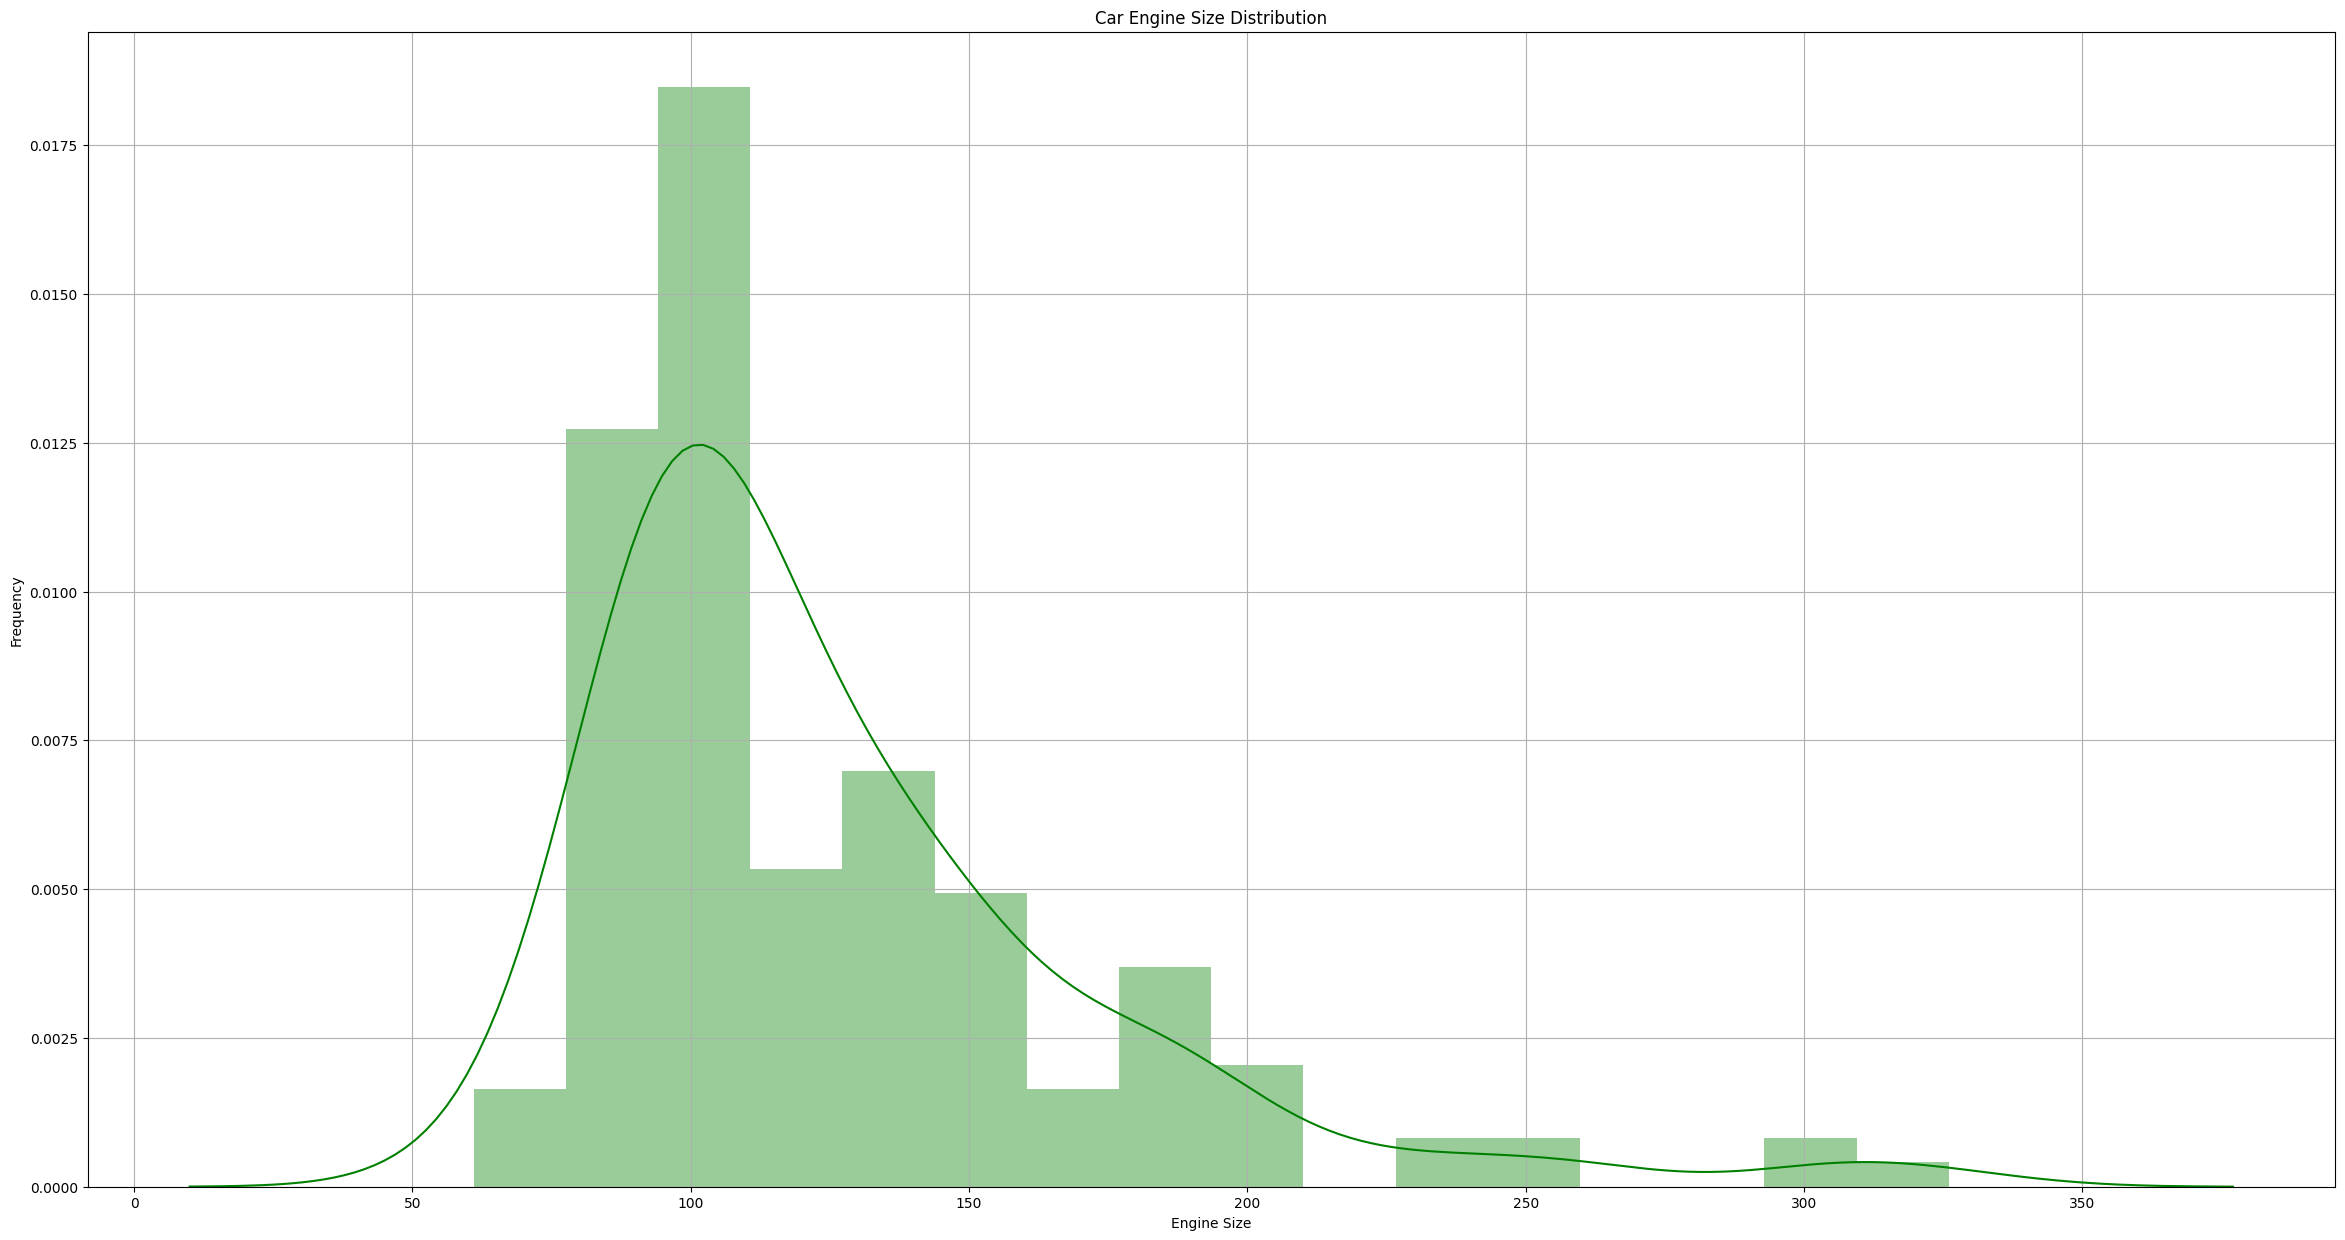

In [106]:
#Car engine size graph plotting
plt.figure(figsize=(29,15))
sns.distplot(car_price_df['enginesize'], color='green')
plt.grid()
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.title('Car Engine Size Distribution')
plt.show()

In [109]:
#Calculating the average engine size
print(f'The average engine size is:', car_price_df['enginesize'].mean())

The average engine size is: 126.52380952380952


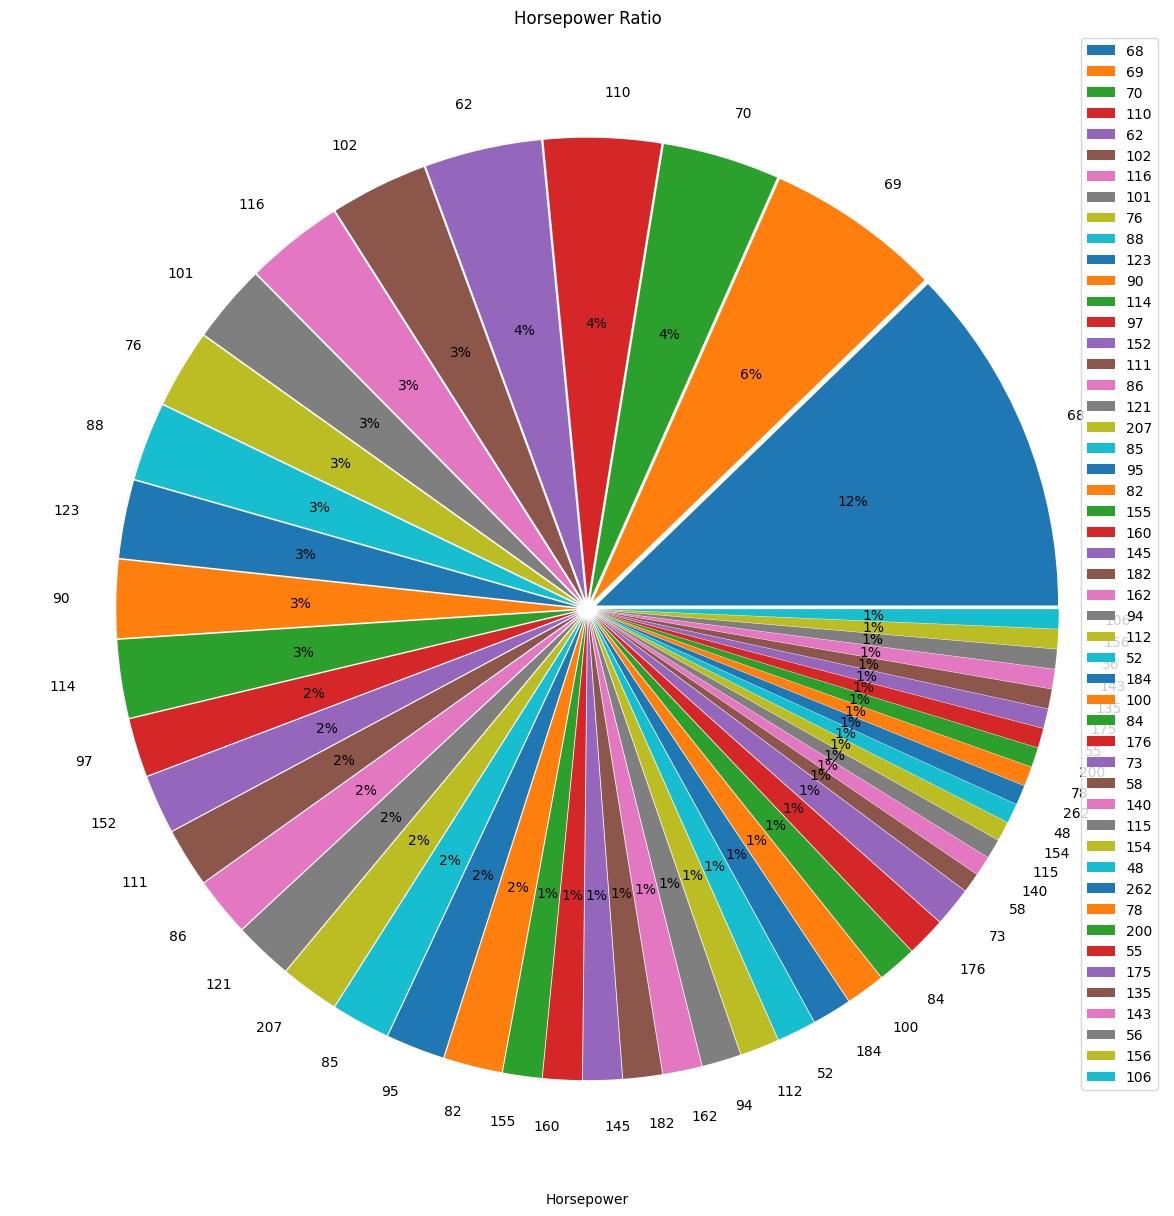

In [119]:
#Horsepower Ratio graph
HorsePower=car_price_df['horsepower'].value_counts()
plt.figure(figsize=(29,15))
plt.pie(HorsePower, labels=HorsePower.index, autopct='%.0f%%', explode=[0.02]*HorsePower.size)
plt.legend(loc='upper right')
plt.grid()
plt.title('Horsepower Ratio')
plt.xlabel('Horsepower')
plt.show()
